In [ ]:
import pandas as pd
import numpy as np
import konlpy

In [ ]:
data = pd.read_csv('../../nlp_poem.csv')
poem = data

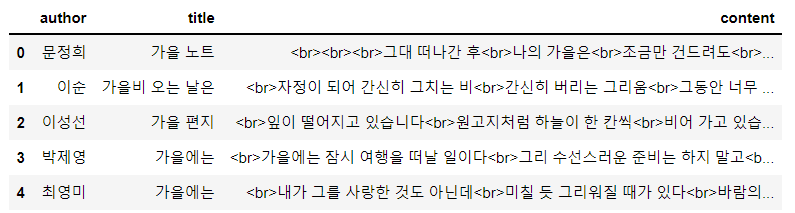

## 전처리, 토큰화

In [ ]:
stopwords = [
    "stop", "words" 
]

In [ ]:
from konlpy.tag import Okt
tagger = Okt()

# 시 내용 가져오기
contents = poem['content']

def preprocessing(text):
    # <br>제거
    text = text.replace("<br>", " ")
    
    # 형태소 분석
    okt_pos = tagger.pos(text, norm=True, stem=True)
    
    # 명사,동사,형용사 사용
    words = [word for word, hts in okt_pos if hts in ['Noun', 'Adjective', 'Verb']]
    
    # 스탑 워드 적용
    words = [word for word in words if word not in stopwords]
    
    return words

content = list(contents.apply(preprocessing))

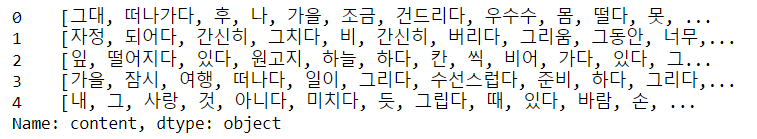

## Word2vec 모델 직접 학습

In [ ]:
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(content, min_count=1) # min_count = 한번 이하로 사용된 단어 학습에 사용안함

In [ ]:
# 단어 사전에서 상위 10개만 보기
vocab = list(model.wv.key_to_index.keys())
vocab[:10]

In [ ]:
# 단어 벡터로 보기
model.wv['가을']

In [ ]:
# 가장 비슷한 단어 == 가장 벡터상 가까이에 위치하고 있는 단어
model.wv.most_similar('사랑')

In [ ]:
# 유사도
model.wv.similarity('가을', '가게')

# 외부 모델 불러와서 재학습

박규병님의 한국어의 미리 학습된 Word2Vec 모델은  
깃허브 주소 https://github.com/Kyubyong/wordvectors  
구글 드라이브 주소 https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g  
에서 다운로드 가능  

용량이 크기 때문에 실제로 다운받지 않겠습니다

In [ ]:
import gensim
WORD2VEC_PATH = '다운받은 경로/ko/ko.bin'

# 외부 모델 불러오기
ko_model = gensim.models.Word2Vec.load(WORD2VEC_PATH)
ko_model.wv.save_word2vec_format("ko.bin.gz", binary=False)

In [ ]:
# 시 데이터를 학습 시킨 내 모델 생성
my_model = Word2Vec(size=330, min_count=1, window=10, iter=35)
my_model.build_vocab(contents)

In [ ]:
# 내 모델에 불러온 외부 모델의 단어를 추가
my_model.build_vocab([list(ko_model.wv.vocab.keys())], update=True)
word2vec_model.intersect_word2vec_format("ko.bin.gz", binary=False)

In [ ]:
# 합친 단어로 모델 재학습
my_model.train(contents, total_examples=examples, epochs=my_model.epochs)

In [ ]:
search_word = '멈추다'

print(my_model.wv.similarity('사랑', search_word), '1') #사랑
print(my_model.wv.similarity('풀', search_word) , '2') #자연
print(my_model.wv.similarity('절망', search_word), '3') #절망
print(my_model.wv.similarity('잊다', search_word), '4') #죽음
print(my_model.wv.similarity('행복', search_word), '5') #행복
print(my_model.wv.similarity('도망', search_word), '6') #슬픔
print(my_model.wv.similarity('좋다', search_word), '7') #좋다
print(my_model.wv.similarity('우정', search_word), '8') #우정
print(my_model.wv.similarity('아버지', search_word), '9') #가족 노인.. 등등
print(my_model.wv.similarity('새벽', search_word), '10') #밤
print(my_model.wv.similarity('송아지', search_word), '11') #동물
print(my_model.wv.similarity('계절', search_word), '12') #계절
print(my_model.wv.similarity('일생', search_word), '13') #일생
print(my_model.wv.similarity('기억', search_word), '14') #기억 추억 과거 등
print(my_model.wv.similarity('머리', search_word), '15') #신체
print(my_model.wv.similarity('바퀴', search_word), '16') #물건
print(my_model.wv.similarity('붉다', search_word), '17') #색깔
print(my_model.wv.similarity('시골', search_word), '18') #동네
print(my_model.wv.similarity('조용하다', search_word), '19') #조용하다
print(my_model.wv.similarity('보리밥', search_word), '20') #음식
print(my_model.wv.similarity('비', search_word), '21') #날씨
print(my_model.wv.similarity('차분해지다', search_word), '22') #차분해지다
print(my_model.wv.similarity('음미', search_word), '23') #사색
print(my_model.wv.similarity('여행', search_word), '24') #여행
print(my_model.wv.similarity('별빛', search_word), '25') #동화 반짝반짝, 무지개 등
print(my_model.wv.similarity('구름', search_word), '26') #감성 별, 하늘 , 달, 빛 등

# 모델 내보내기

In [ ]:
# my_model.save('word2vec')